# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [60]:
import pandas as pd
movies = pd.read_csv("movies.csv")
movies.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


Visualize os dados com um gráfico de dispersão:

Text(0, 0.5, 'Arrecadação')

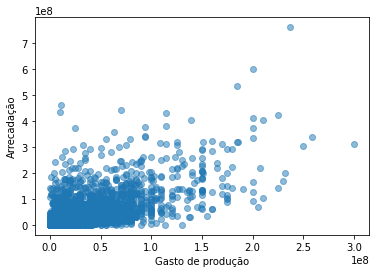

In [64]:
import matplotlib.pyplot as plt

plt.scatter(movies["Production Budget"],movies["US Gross"],alpha=0.50)
plt.xlabel("Gasto de produção")
plt.ylabel("Arrecadação")

Use a regressão linear para encontrar os coeficientes a e b:

In [175]:
from scipy.stats import linregress

values = linregress(movies["Production Budget"].fillna(movies["Production Budget"].median()),movies["US Gross"].fillna(movies["US Gross"].median()))
a = values.slope
b = values.intercept
print("a =", a,"b = ",b)


a = 1.0953173515941526 b =  9927198.264811307


Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [176]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

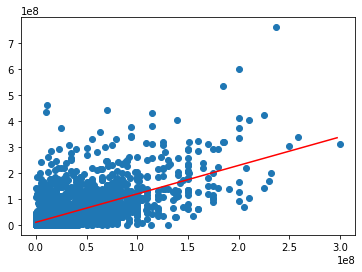

In [177]:
show_regression(movies["Production Budget"], movies["US Gross"], a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [179]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.36'
    """
    predicao = (production_budget * a) + b
    return predicao


## Teste

In [180]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
**********************************************************************
File "__main__", line 3, in __main__.predict
Failed example:
    f'{predict(100000):.2f}'
Expected:
    '10006058.40'
Got:
    '10036730.00'
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    10992208.78'
**********************************************************************
File "__main__", line 6, in __main__.predict
Failed example:
    f'{predict(1000000):.2f}'
Expected:
    10992208.78'
Got:
    '11022515.62'
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.36'
**********************************************************************
File "__main__", line 9, in __main__.predict
Failed example:
    f'{predict(5000000):.2f}'
Expected:
    '15375099.36'
Got:
    '15403785.02'
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
**********************************************************************
1 items

TestResults(failed=3, attempted=3)